# HR Analytics: Employee Attrition Prediction

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **1. Load and explore Dataset**

In [2]:
df = pd.read_csv("HR_Analytics.csv.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Get the number of rows and columns

In [3]:
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1470
Number of columns: 35



Prints the data types of each column

In [4]:
column_types = df.dtypes

print("Types of columns:")
print(column_types)

Types of columns:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
To

Checking for null values

In [5]:
nulls_exist = df.isnull().any().any()

if nulls_exist:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


Ensure Attrition is categorical (0 or 1)

In [6]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].astype(int)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### **2. Exploratory Data Analysis (EDA)**

Check for missing values

In [7]:
display(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Summary statistics

In [8]:
display(df.describe())

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Descriptive statistics for non-numeric columns

In [9]:
df.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


Visualizing the distribution of target variable

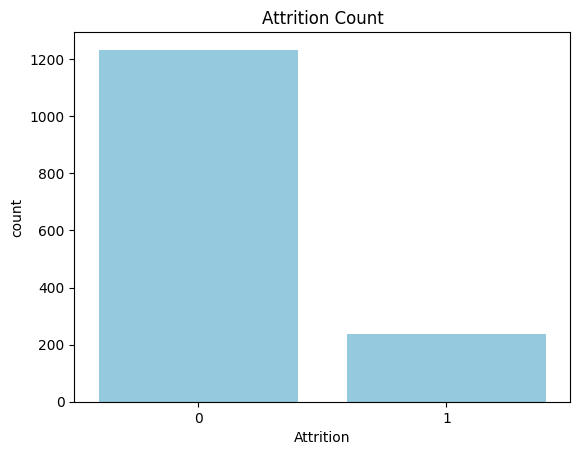

In [10]:
sns.countplot(x=df['Attrition'], color='skyblue')
plt.title("Attrition Count")
plt.show()

Correlation Heatmap

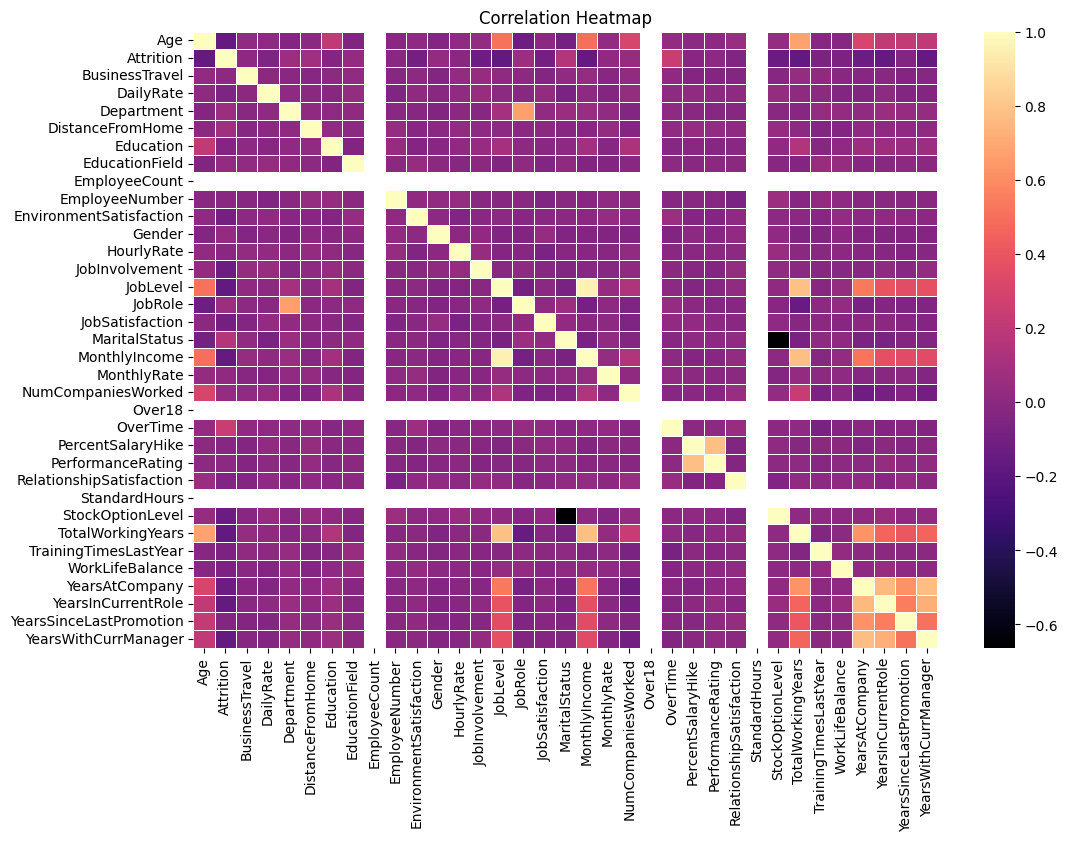

In [11]:
# Convert categorical variables into numeric 
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for potential inverse transformations

# correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='magma', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Attrition rate based on Department

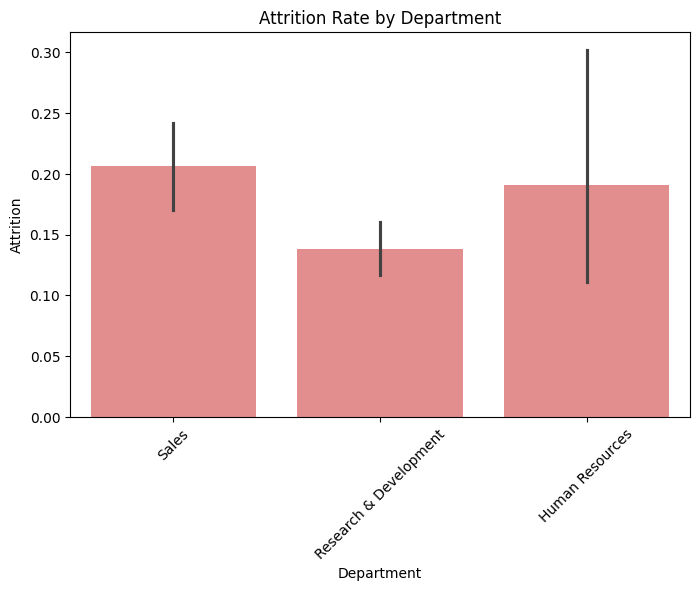

In [12]:
# Reverse mapping for Department column
department_labels = label_encoders['Department'].classes_
department_mapping = {i: label for i, label in enumerate(department_labels)}

# Replace numeric Department values with original names
df['Department'] = df['Department'].map(department_mapping)

plt.figure(figsize=(8, 5))
sns.barplot(x='Department', y='Attrition', data=df, color='lightcoral')
plt.title('Attrition Rate by Department')
plt.xticks(rotation=45)
plt.show()


Monthly Income Distribution

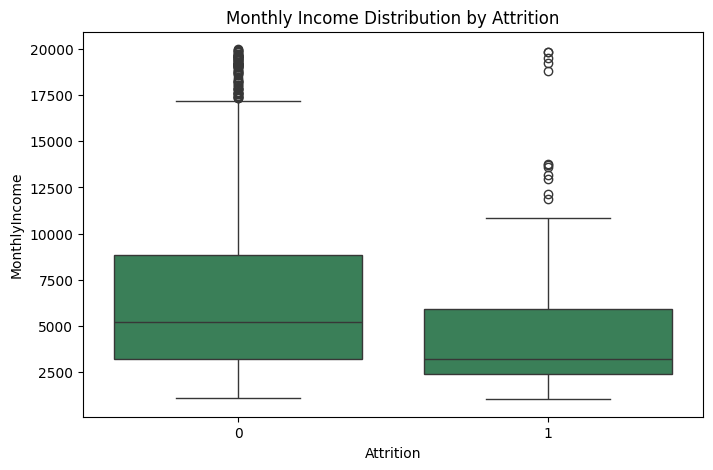

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, color='seagreen')
plt.title('Monthly Income Distribution by Attrition')
plt.show()

### **3. Data Cleaning and Preprocessing**

Drop columns that are irrelevant for modeling

In [14]:
df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours'], inplace=True)

Convert categorical variables into numeric using Label Encoding

In [15]:
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



Normalize numerical features

In [16]:
numerical_columns = df.drop(columns=['Attrition']).select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Display cleaned dataset

In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


### **4. Train a Baseline Model**

Split into training and testing sets

In [18]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train is integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(y_train.unique())  
print(y_train.dtype)  


[0 1]
int64


In [19]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())  


Class distribution after SMOTE:
Attrition
0    978
1    978
Name: count, dtype: int64


C:\Users\noura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\noura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^

* Train Decision Tree model

In [20]:
# Train the Decision Tree model on balanced data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Print accuracy
print("Decision Tree Accuracy after SMOTE:", accuracy_score(y_test, y_pred_dt))

# Print classification report
print(classification_report(y_test, y_pred_dt))



Decision Tree Accuracy after SMOTE: 0.8027210884353742
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       255
           1       0.24      0.23      0.24        39

    accuracy                           0.80       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.80      0.80       294



* Confusion Matrix for Decision Tree

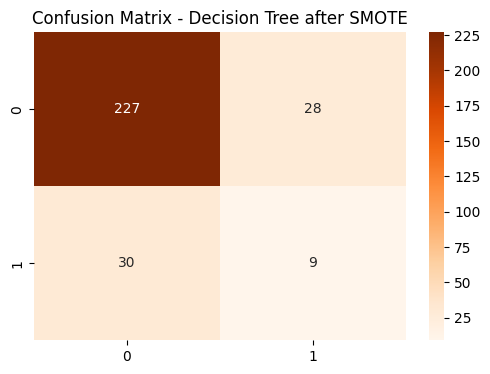

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree after SMOTE")
plt.show()

* Train Random Forest

In [22]:
# Train the Random Forest model on balanced data
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Print accuracy
print("Random Forest Accuracy after SMOTE:", accuracy_score(y_test, y_pred_rf))

# Print classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy after SMOTE: 0.8673469387755102
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       255
           1       0.50      0.18      0.26        39

    accuracy                           0.87       294
   macro avg       0.69      0.58      0.60       294
weighted avg       0.83      0.87      0.84       294



* Confusion Matrix for Random Forest

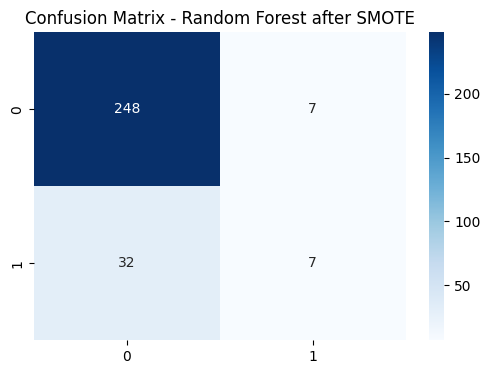

In [23]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest after SMOTE")
plt.show()